In [7]:
import pandas as pd
print(pd.__version__)

import openpyxl
print(openpyxl.__version__)

import sys
print(sys.executable)

import scipy
print(scipy.__version__)

2.2.3
3.1.5
/home/newuser/Documents/.conda/bin/python
1.15.3


In [9]:
import pandas as pd
file_path = "/home/newuser/Documents/Battery/Battery_data/LISHEN/LISHEN_LFP_1.0C-2.0D_T25_1/LISHEN_LFP_1.0C-2.0D_T25_1.xlsx"
xls = pd.ExcelFile(file_path)
print("Sheet 名称如下：")
print(xls.sheet_names)

Sheet 名称如下：
['Cycle_66_4_8', 'Statis_66_4_8', 'Detail_66_4_8']


In [10]:
# 读取第二个电池的sheet名称
import pandas as pd
file_path = "/home/newuser/Documents/Battery/Battery_data/LISHEN/LISHEN_LFP_1.0C-2.0D_T25_1/LISHEN_LFP_1.0C-2.0D_T25_1.xlsx"
xls = pd.ExcelFile(file_path)
print("Sheet 名称如下：")
print(xls.sheet_names)

Sheet 名称如下：
['Cycle_66_4_8', 'Statis_66_4_8', 'Detail_66_4_8']


In [ ]:
# 2.load all data of the sheets
import pandas as pd
file_path = "/home/newuser/Documents/Battery/Battery_data/LISHEN/LISHEN_LFP_1.0C-2.0D_T25_1/LISHEN_LFP_1.0C-2.0D_T25_1.xlsx"
cycle = pd.read_excel(file_path, sheet_name='Cycle_66_4_8')
statis = pd.read_excel(file_path, sheet_name='Statis_66_4_8')
detail = pd.read_excel(file_path, sheet_name='Detail_66_4_8')
print(cycle.head())
print(statis.head())
print(detail.head())

: 

In [1]:
# Statistic the number of cycle
import pandas as pd
file_path = "/home/newuser/Documents/Battery/Battery_data/LISHEN/LISHEN_LFP_1.0C-2.0D_T25_1/LISHEN_LFP_1.0C-2.0D_T25_1-2.xlsx"
detail = pd.read_excel(file_path, sheet_name=2)
unique_cycles = detail['Cycle'].unique()
print(f"共发现 {len(unique_cycles)} 个循环(Cycle):")
print(unique_cycles)

ValueError: Worksheet index 2 is invalid, 1 worksheets found

In [29]:
# IC Curve from sheet3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "/home/newuser/Documents/NDP/Battery/Battery_data/LISHEN/LISHEN_LFP_1.0C-2.0D_T25_1/LISHEN_LFP_1.0C-2.0D_T25_1.xlsx"
detail = pd.read_excel(file_path, sheet_name='Detail_66_4_8') 
detail_1 = detail[(detail['Cycle'] == 1) & (detail['State'].str.contains('Charge', case=False))]
print(detail_1.head())
print(detail_1.columns)
print(detail_1.info())
print(detail_1.describe())
print(detail_1[['Voltage(V)', 'Capacity(mAh)']].head())

Empty DataFrame
Columns: [Record number, State, Jump, Cycle, Steps, Current(mA), Voltage(V), Capacity(mAh), Energy(Wh), Relative Time(h:min:s.ms), Date(h:min:s.ms)]
Index: []
Index(['Record number', 'State', 'Jump', 'Cycle', 'Steps', 'Current(mA)',
       'Voltage(V)', 'Capacity(mAh)', 'Energy(Wh)',
       'Relative Time(h:min:s.ms)', 'Date(h:min:s.ms)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Record number              0 non-null      int64  
 1   State                      0 non-null      object 
 2   Jump                       0 non-null      int64  
 3   Cycle                      0 non-null      int64  
 4   Steps                      0 non-null      int64  
 5   Current(mA)                0 non-null      float64
 6   Voltage(V)                 0 non-null      float64
 7   Capacity(mAh)          

In [34]:
# 过滤掉异常的dV非零点
voltage = detail['Voltage(V)'].values
capacity = detail['Capacity(mAh)'].values
# 计算差分
dV = np.diff(voltage)
dQ = np.diff(capacity)

# 设置阈值，避免除以太小的数值
valid = np.abs(dV) > 1e-5
dQ_dV = dQ[valid] / dV[valid]
voltage_mid = (voltage[:-1] + voltage[1:]) / 2
voltage_mid = voltage_mid[valid]
print(detail_1[['Voltage(V)', 'Capacity(mAh)']].isnull().sum()) # 检查无空值


Voltage(V)       0
Capacity(mAh)    0
dtype: int64


Text(0.5, 1.0, 'Incremental Capacity Curve (Cycle 1 - Charge)')

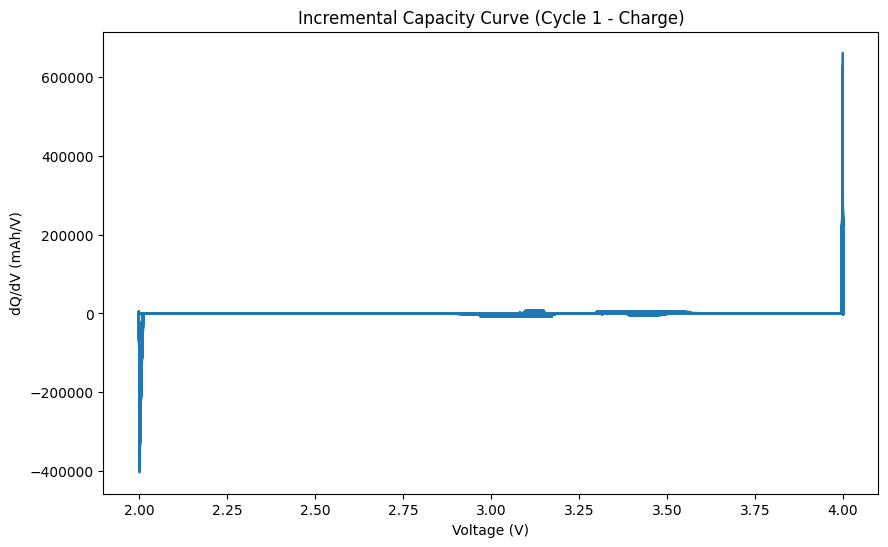

In [37]:
# voltage = detail['Voltage(V)'].values
# capacity = detail['Capacity(mAh)'].values
# dV = np.diff(voltage)
# dQ = np.diff(capacity)
# epsilon = 1e-8
# dQ_dV = dQ / (dV + epsilon)
# voltage_mid = (voltage[:-1] + voltage[1:]) / 2 
plt.figure(figsize=(10, 6))
plt.plot(voltage_mid, dQ_dV, label='Cycle 1 Charge')
plt.xlabel('Voltage (V)')
plt.ylabel('dQ/dV (mAh/V)')
plt.title('Incremental Capacity Curve (Cycle 1 - Charge)')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

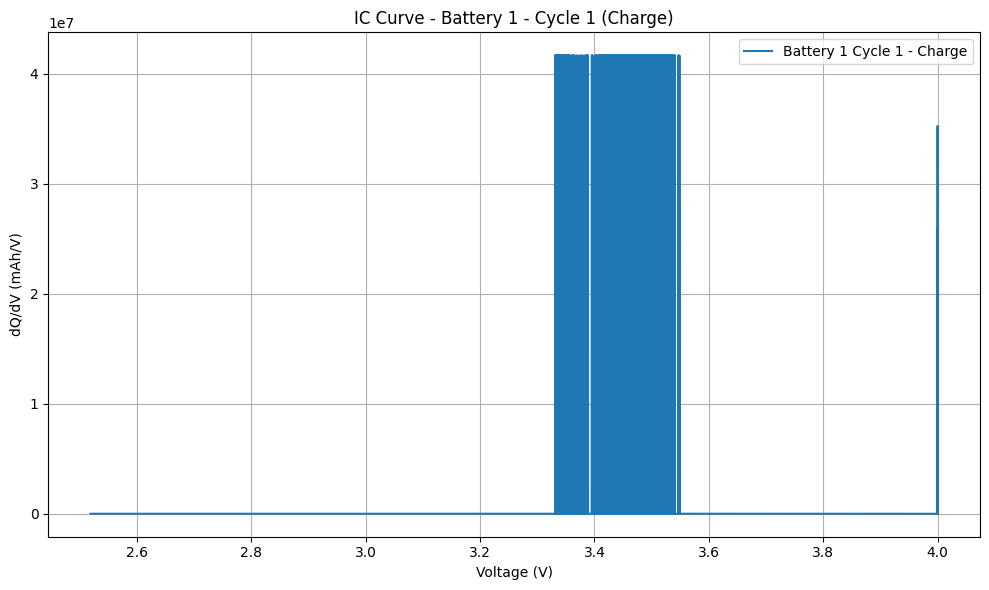

In [ ]:
                import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 文件路径（只处理 Battery 1）
battery_name = "Battery 1"
file_path = "/home/newuser/Documents/NDP/Battery/Battery_data/LISHEN/LISHEN_LFP_1.0C-2.0D_T25_1/LISHEN_LFP_1.0C-2.0D_T25_1.xlsx"
sheet_name = "Detail_66_4_8"

# 读取数据
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 筛选 Cycle 1 且为充电阶段（State 包含 Chg 但不包含 DChg）
df_cycle1_charge = df[
    (df['Cycle'] == 1) &
    (df['State'].str.contains('Chg', case=False, na=False)) &
    (~df['State'].str.contains('DChg', case=False, na=False))
].copy()

# 提取 Voltage 和 Capacity
voltage = df_cycle1_charge['Voltage(V)'].values
capacity = df_cycle1_charge['Capacity(mAh)'].values

# 计算 dQ/dV
dV = voltage[1:] - voltage[:-1]
dQ = capacity[1:] - capacity[:-1]
epsilon = 1e-8  # 防止除以 0
dQ_dV = dQ / (dV + epsilon)
voltage_mid = (voltage[1:] + voltage[:-1]) / 2

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(voltage_mid, dQ_dV, label=f"{battery_name} Cycle 1 - Charge")
plt.xlabel("Voltage (V)")
plt.ylabel("dQ/dV (mAh/V)")
plt.title("IC Curve - Battery 1 - Cycle 1 (Charge)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

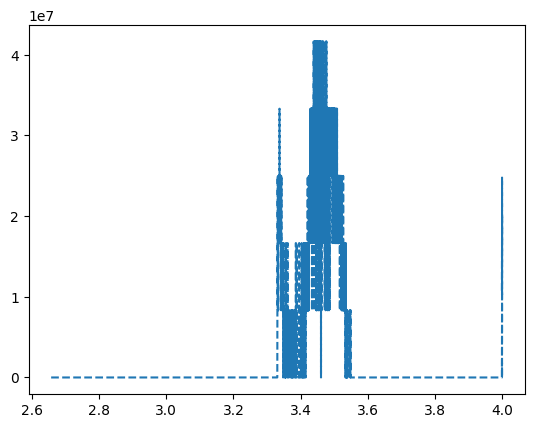

In [43]:
# 简单平滑曲线
def moving_average(x, window=5):
    return np.convolve(x, np.ones(window)/window, mode='valid')

dQ_dV_smooth = moving_average(dQ_dV, window=5)
voltage_mid_smooth = voltage_mid[2:-2]  # 保持一致长度
plt.plot(voltage_mid_smooth, dQ_dV_smooth, label="Smoothed", linestyle='--')

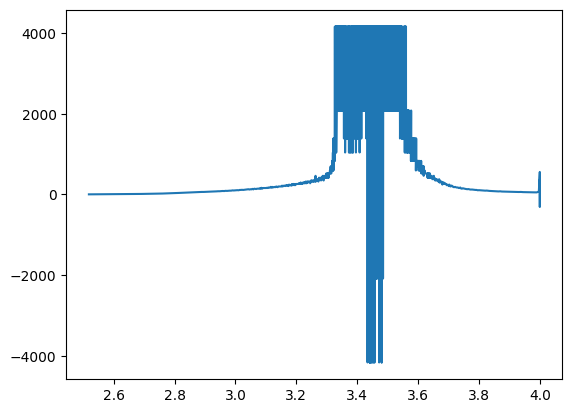

In [45]:
# 差分计算
dV = voltage[1:] - voltage[:-1]
dQ = capacity[1:] - capacity[:-1]
epsilon = 1e-8

# 过滤掉电压变化过小的点
valid = np.abs(dV) > 1e-4
dV = dV[valid]
dQ = dQ[valid]
voltage_mid = (voltage[1:] + voltage[:-1])[valid] / 2

# dQ/dV
dQ_dV = dQ / (dV + epsilon)

# 绘图
plt.plot(voltage_mid, dQ_dV)